In [73]:
!pip install xgboost

In [77]:
import pandas as pd #Untuk membaca dan menulis data dari berbagai format file.
import matplotlib.pyplot as plt #Untuk membuat plot dan visualisasi.
import seaborn as sns #Untuk visualisasi data statistik, membuat grafik yang informatif dan menarik.
from sklearn.model_selection import train_test_split #Untuk membagi data menjadi bagian pelatihan dan pengujian model.
from sklearn.preprocessing import StandardScaler, label_binarize #Untuk menstandarisasi fitur dengan mengubahnya menjadi distribusi dengan rata-rata 0 dan deviasi standar 1.
from sklearn.pipeline import Pipeline #Untuk menggabungkan beberapa langkah preprocessing dan pemodelan menjadi satu alur kerja, menyederhanakan proses.
from sklearn.model_selection import GridSearchCV #Untuk mencari parameter terbaik untuk model machine learning secara otomatis, mengoptimalkan kinerja model.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc #untuk mengevaluasi kinerja model, termasuk classification_report, confusion_matrix, dan accuracy_score, yang memberikan informasi tentang akurasi dan kesalahan model.
from sklearn.linear_model import LogisticRegression #Mengimplementasikan model regresi logistik, yang digunakan untuk klasifikasi biner.
from sklearn.tree import DecisionTreeClassifier #Untuk membuat model klasifikasi berbasis pohon keputusan, yang membagi data berdasarkan fitur untuk membuat keputusan.
from sklearn.neighbors import KNeighborsClassifier #Mengimplementasikan algoritma k-nearest neighbors (k-NN) untuk klasifikasi, yang mengklasifikasikan data berdasarkan kedekatannya dengan data lain.
from xgboost import XGBClassifier #Metode boosting yang efisien dan sering digunakan dalam kompetisi machine learning untuk klasifikasi dan regresi.
import numpy as np #Untuk operasi numerik dan penanganan array.
import xgboost as xgb #Metode boosting yang efisien dan sering digunakan dalam kompetisi machine learning untuk klasifikasi dan regresi.

## Load the dataset

In [2]:
data = pd.read_csv('/content/winequality-red.csv', delimiter=';')

In [4]:
print(data.head())
#Menampilkan Beberapa Baris Pertama dari Dataset

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
duplicate_rows = data[data.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")
#Memeriksa duplikasi

Jumlah baris duplikat: 240


In [7]:
print("Cek Missing Values:")
print(data.isnull().sum())
#Mengidentifikasi nilai yang hilang dalam DataFrame data

Cek Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Pemrosesan Data

In [8]:
X = data.drop('quality', axis=1)
y = (data['quality'] >= 6).astype(int) # Binary classification: good quality if rating >= 6
#mempersiapkan data untuk analisis lebih lanjut

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
##Membagi dataset menjadi data training dan data testing.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Melakukan standarisasi pada fitur-fitur dalam dataset

## Visualisasi Data

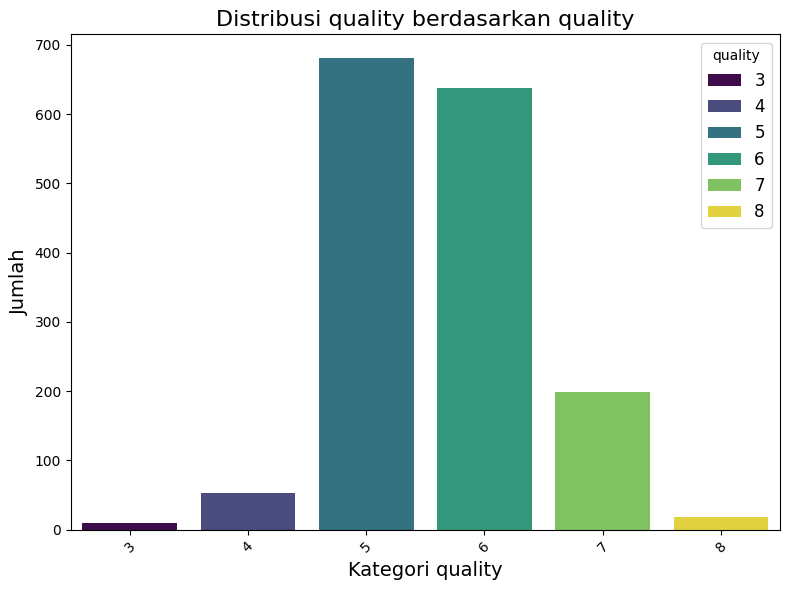

In [60]:
# Deteksi kolom kategorikal
target_column = 'quality'
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Jika tidak ada kolom kategorikal, kita bisa menggunakan kolom 'quality' sebagai kategorikal
if not categorical_columns:
    categorical_columns = [target_column]

# Hapus kolom target dari daftar kolom kategorikal (jika ada)
categorical_columns = [col for col in categorical_columns if col != target_column]

# Jika tidak ada kolom kategorikal lain, kita hanya akan menggunakan kolom target
if not categorical_columns:
    categorical_columns = [target_column]

# Buat barplot untuk setiap kolom kategorikal terhadap target
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, hue=target_column, palette='viridis')
    plt.title(f'Distribusi {col} berdasarkan {target_column}', fontsize=16)
    plt.xlabel(f'Kategori {col}', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title=target_column, loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()

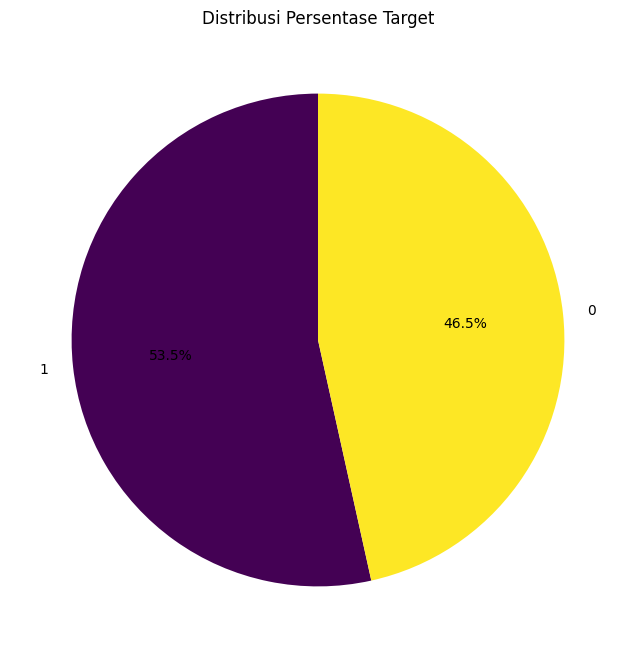

In [55]:
target_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.viridis(np.linspace(0, 1, len(target_counts))))
plt.title("Distribusi Persentase Target")
plt.show()
#Pie Chart untuk Distribusi Target

<ipython-input-17-2c0a6fe4dcb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')


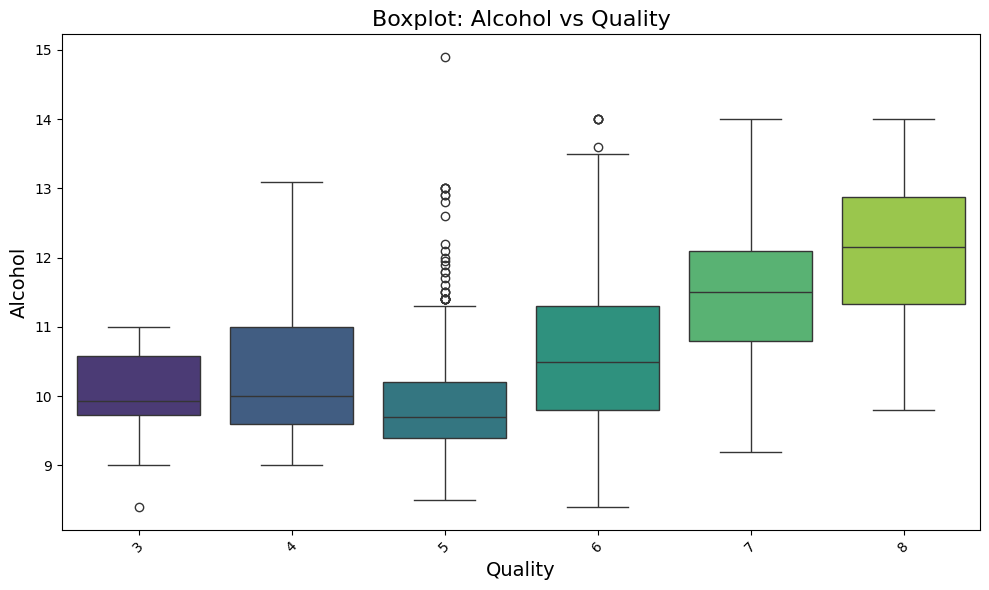

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')
plt.title('Boxplot: Alcohol vs Quality', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Membuat visualisasi boxplot yang menunjukkan hubungan antara kadar alkohol dan kualitas dalam dataset.

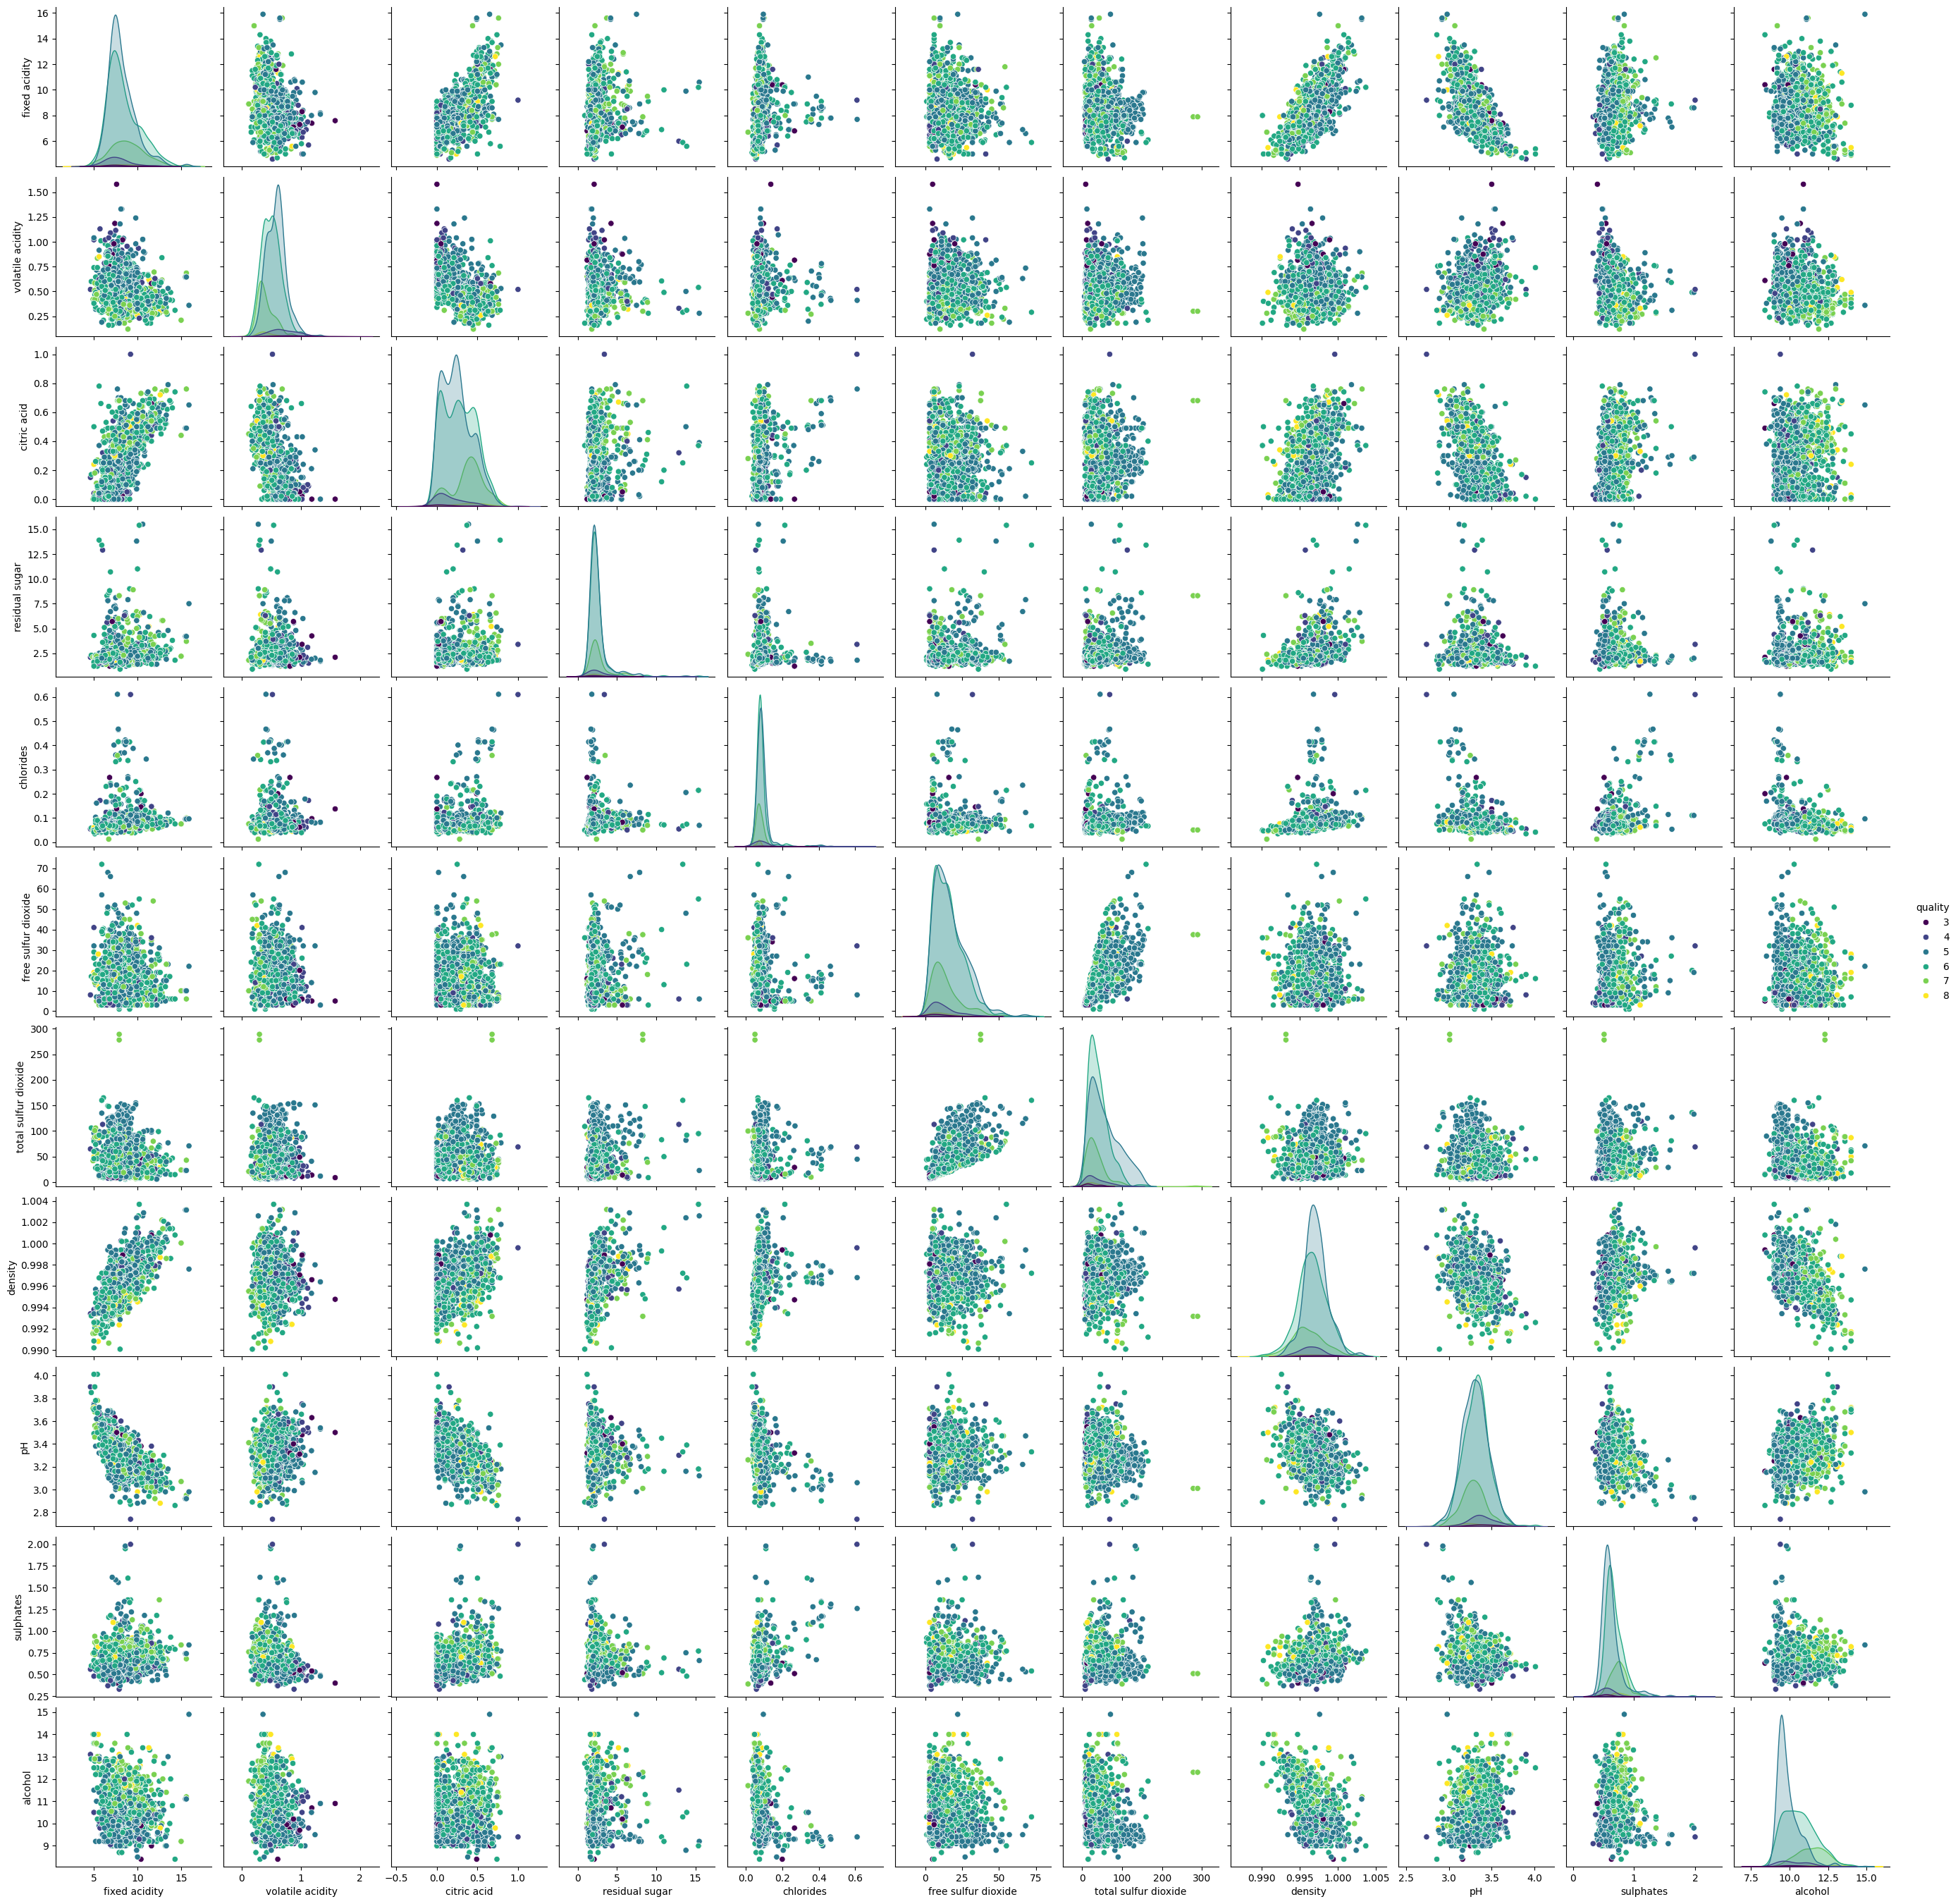

In [18]:
sns.pairplot(data, hue='quality', palette='viridis')
plt.show()
#Membuat visualisasi pairplot menggunakan Seaborn, yang menunjukkan hubungan antara semua pasangan variabel numerik dalam dataset

## Logistik Regression

In [19]:
pipeline_lr = Pipeline([ ('scaler', StandardScaler()), ('logistic_regression', LogisticRegression(max_iter=1000)) ])
#Membuat pipeline menggunakan Logistic Regression

In [21]:
param_grid_lr = { 'logistic_regression__penalty': ['l1', 'l2'], 'logistic_regression__C': [0.01, 0.1, 1, 10, 100], 'logistic_regression__solver': ['liblinear'] }
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
#Melakukan hyperparameter tuning pada model regresi logistik menggunakan GridSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logistic_regression__C': [0.01, 0.1, 1, 10, 100],
                         'logistic_regression__penalty': ['l1', 'l2'],
                         'logistic_regression__solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [28]:
print("Best parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best score (Logistic Regression):", grid_search_lr.best_score_)
#Mengevaluasi dan melaporkan hasil dari proses hyperparameter tuning yang dilakukan dengan GridSearchCV.

Best parameters (Logistic Regression): {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best score (Logistic Regression): 0.7467310049019608


In [31]:
y_pred_lr = grid_search_lr.predict(X_test)
print("Accuracy on test set (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
#Mengevaluasi performa model regresi logistik yang telah dilatih dan dioptimalkan menggunakan GridSearchCV

Accuracy on test set (Logistic Regression): 0.7375

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       141
           1       0.78      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



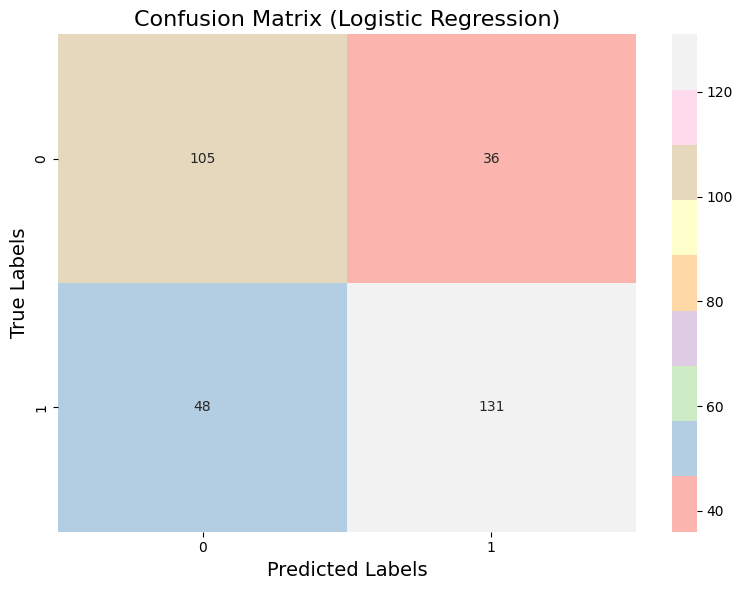

In [32]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (Logistic Regression)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()
#Membuat dan menampilkan confusion matrix dari model regresi logistik yang telah dilatih.

In [62]:
# Binarize target untuk multiclass
y_true = label_binarize(y_test, classes=np.unique(y))
best_model = grid_search_lr.best_estimator_  # Assign the best model from grid search
y_score = best_model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


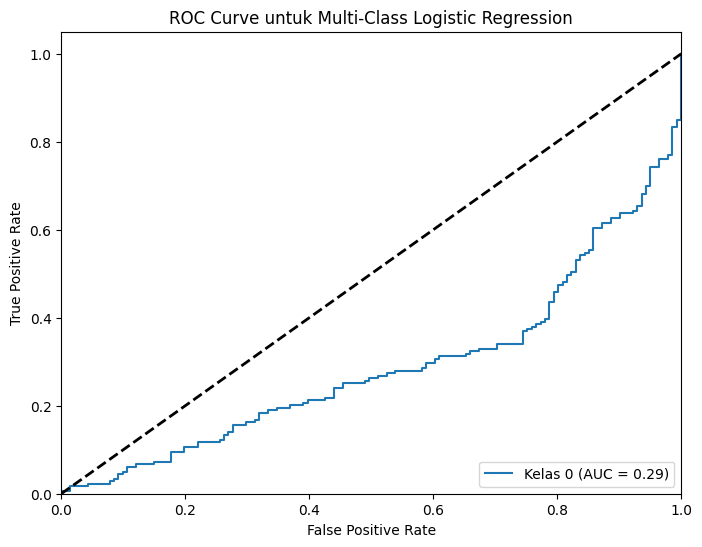

In [65]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Menggunakan predict_proba untuk mendapatkan probabilitas dari regresi logistik
# Use best_model instead of log_reg
y_score = best_model.predict_proba(X_test_scaled)  # Probabilitas prediksi untuk semua kelas

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [33]:
pipeline_dt = Pipeline([ ('decision_tree', DecisionTreeClassifier()) ])
#Membuat pipeline menggunakan Decision Tree Classifier

In [34]:
param_grid_dt = { 'decision_tree__criterion': ['gini', 'entropy'], 'decision_tree__max_depth': [None, 5, 10, 20], 'decision_tree__min_samples_split': [2, 5, 10], 'decision_tree__min_samples_leaf': [1, 2, 4] }
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
#Melakukan hyperparameter tuning pada model decision tree menggunakan GridSearchCV

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [None, 5, 10, 20],
                         'decision_tree__min_samples_leaf': [1, 2, 4],
                         'decision_tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [35]:
print("Best parameters (Decision Tree):", grid_search_dt.best_params_)
print("Best score (Decision Tree):", grid_search_dt.best_score_)
#Mengevaluasi performa model decision tree yang telah dilatih dan dioptimalkan menggunakan GridSearchCV

Best parameters (Decision Tree): {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 20, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 2}
Best score (Decision Tree): 0.7443412990196079


In [36]:
y_pred_dt = grid_search_dt.predict(X_test)
print("Accuracy on test set (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
#Mengevaluasi dan melaporkan hasil dari proses hyperparameter tuning yang dilakukan dengan GridSearchCV.

Accuracy on test set (Decision Tree): 0.715625

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       141
           1       0.75      0.73      0.74       179

    accuracy                           0.72       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



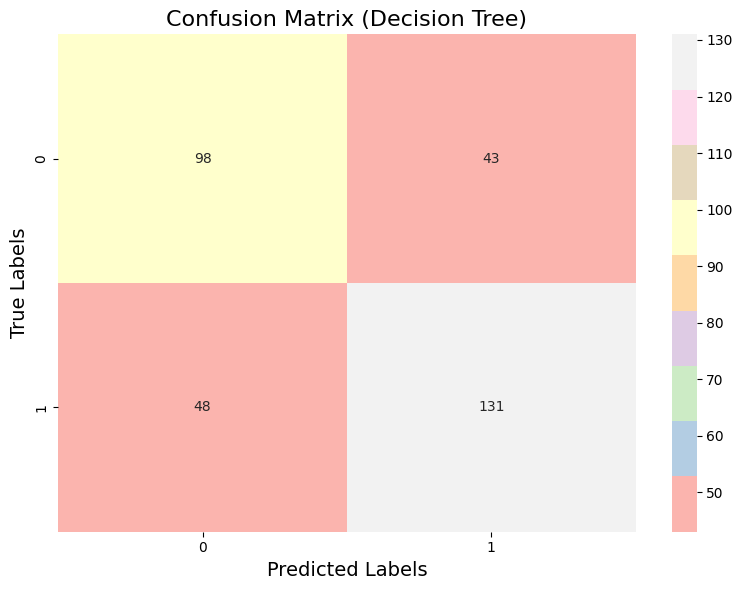

In [42]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (Decision Tree)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()
#Membuat dan menampilkan confusion matrix dari model decision tree yang telah dilatih.

In [66]:
# Binarize target untuk multiclass
y_true = label_binarize(y_test, classes=np.unique(y))
best_model = grid_search_lr.best_estimator_  # Assign the best model from grid search
y_score = best_model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

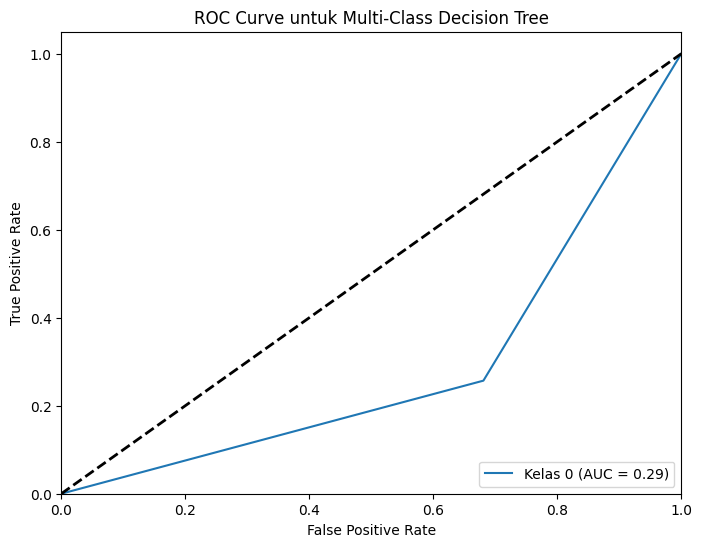

In [68]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Menggunakan predict_proba untuk mendapatkan probabilitas dari Decision Tree
dt_classifier = DecisionTreeClassifier()  # You can pass hyperparameters here if needed
dt_classifier.fit(X_train_scaled, y_train)  # Assuming you have X_train_scaled and y_train
y_score = dt_classifier.predict_proba(X_test_scaled)  # Probabilitas prediksi untuk semua kelas

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Decision Tree')
plt.legend(loc='lower right')
plt.show()

## K-Nearest Neighbors




In [38]:
pipeline_knn = Pipeline([ ('scaler', StandardScaler()), ('knn', KNeighborsClassifier()) ])
#Membuat pipeline menggunakan k-NN Classifier

In [39]:
param_grid_knn = { 'knn__n_neighbors': range(1, 21), 'knn__weights': ['uniform', 'distance'], 'knn__metric': ['euclidean', 'manhattan'] }
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
#Melakukan hyperparameter tuning pada model k-NN menggunakan GridSearchCV

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [48]:
print("Best parameters (k-NN):", grid_search_knn.best_params_)
print("Best score (k-NN):", grid_search_knn.best_score_)
#Mengevaluasi performa model k-NN yang telah dilatih dan dioptimalkan menggunakan GridSearchCV

Best parameters (k-NN): {'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
Best score (k-NN): 0.7959589460784313


In [41]:
y_pred_knn = grid_search_knn.predict(X_test)
print("Accuracy on test set (k-NN):", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (k-NN):")
print(classification_report(y_test, y_pred_knn))
#Mengevaluasi dan melaporkan hasil dari proses hyperparameter tuning yang dilakukan dengan GridSearchCV.

Accuracy on test set (k-NN): 0.790625

Classification Report (k-NN):
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       141
           1       0.80      0.83      0.82       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



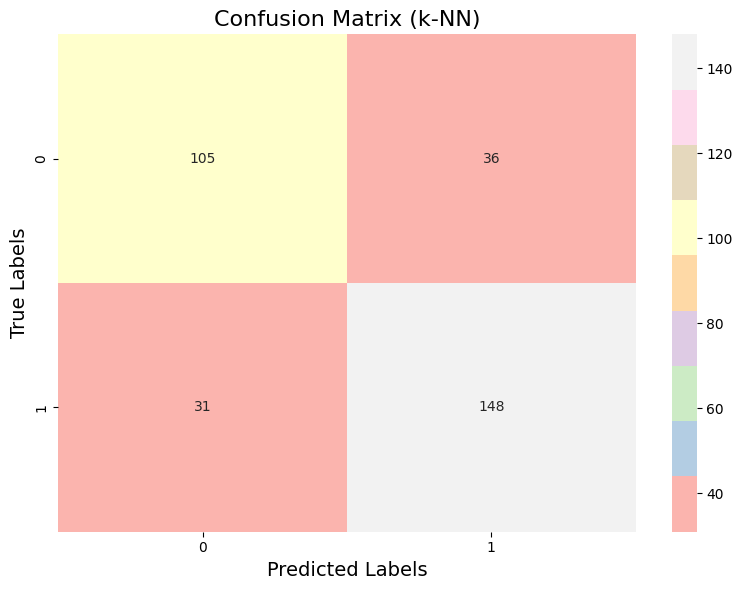

In [43]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (k-NN)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()
#Membuat dan menampilkan confusion matrix dari model k-NN yang telah dilatih.

In [69]:
# Binarize target untuk multiclass
y_true = label_binarize(y_test, classes=np.unique(y))
best_model = grid_search_lr.best_estimator_  # Assign the best model from grid search
y_score = best_model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

Fitting 5 folds for each of 80 candidates, totalling 400 fits


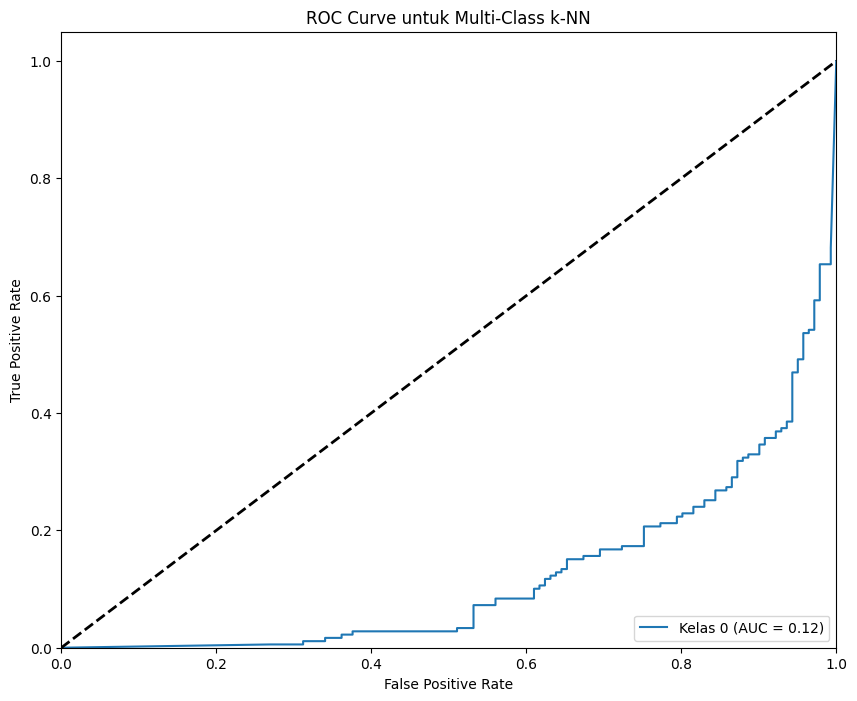

In [54]:
# Binarize y untuk multi-class ROC
# Change: Use y_test instead of y
y_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_binarized.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Model terbaik
best_model_knn = grid_search_knn.best_estimator_

# Prediksi menggunakan model terbaik
y_pred = best_model_knn.predict(X_test)

# Menggunakan predict_proba untuk mendapatkan probabilitas dari k-NN
y_score = best_model_knn.predict_proba(X_test)

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class k-NN')
plt.legend(loc='lower right')
plt.show()

## XGBoost Classification

In [45]:
pipeline_xgb = Pipeline([ ('scaler', StandardScaler()), ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')) ])
#Membuat pipeline menggunakan XGBoost classification

In [47]:
param_grid_xgb = { 'xgb__n_estimators': [50, 100], 'xgb__learning_rate': [0.1, 0.2], 'xgb__max_depth': [3, 5], 'xgb__subsample': [0.8, 1.0], 'xgb__colsample_bytree': [0.8, 1.0], 'xgb__gamma': [0, 1], 'xgb__reg_alpha': [0, 0.1], 'xgb__reg_lambda': [1, 1.5] }
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
#Melakukan hyperparameter tuning pada model  XGBoost menggunakan GridSearchCV

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:55:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_t...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__gamma': [0, 1], 'xgb__learning_rate': [0.1, 0.2],
                         'xgb__max_depth': [3, 5],
                         'xgb__n_estimators': [50, 100],
                         'xgb__reg_alpha': [0, 0.1],
                         'xgb__reg_lambda': [1, 1.5],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [49]:
print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best score (XGBoost):", grid_search_xgb.best_score_)
#Mengevaluasi performa model XGBoost yang telah dilatih dan dioptimalkan menggunakan GridSearchCV

Best parameters (XGBoost): {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
Best score (XGBoost): 0.8053615196078432


In [50]:
y_pred_xgb = grid_search_xgb.predict(X_test)
print("Accuracy on test set (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
#Mengevaluasi dan melaporkan hasil dari proses hyperparameter tuning yang dilakukan dengan GridSearchCV.

Accuracy on test set (XGBoost): 0.79375

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       141
           1       0.82      0.82      0.82       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



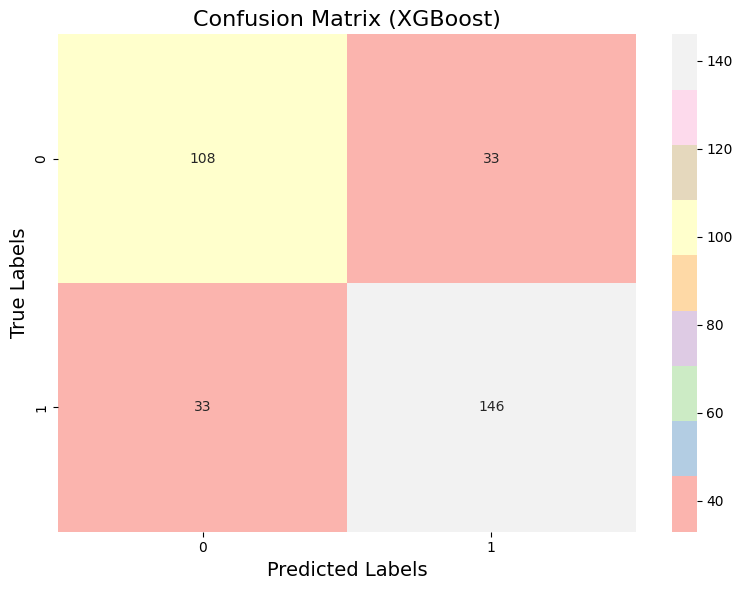

In [51]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (XGBoost)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()
#Membuat dan menampilkan confusion matrix dari model XGBoost yang telah dilatih.

In [70]:
# Binarize target untuk multiclass
y_true = label_binarize(y_test, classes=np.unique(y))
best_model = grid_search_lr.best_estimator_  # Assign the best model from grid search
y_score = best_model.predict_proba(X_test)  # Probabilitas prediksi untuk semua kelas

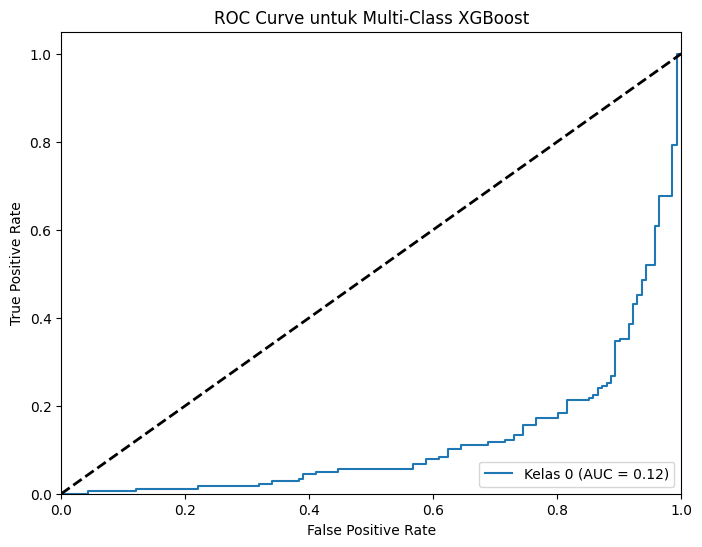

In [78]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Menggunakan predict_proba untuk mendapatkan probabilitas dari XGBoost
xgb_classifier = xgb.XGBClassifier() # Create an XGBoost classifier object
xgb_classifier.fit(X_train_scaled, y_train) # Assuming you have X_train_scaled and y_train for training
y_score = xgb_classifier.predict_proba(X_test_scaled)  # Probabilitas prediksi untuk semua kelas

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class XGBoost')
plt.legend(loc='lower right')
plt.show()